# Lab 05: Explore data visually

## Challenge 0: Make a figure for Lab Report 1

Now we have explored our own data a little bit, and you have seen lots of examples of different kinds of plots that can be made. Now try to make the plot that best tells the story of these data.

In [1]:
# Start by importing the data...

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

####
import ssl 

ssl._create_default_https_context = ssl._create_unverified_context
####

file = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Experiments/LexicalDecision/LexicalDecision_1/data/Lab_report_01.csv'
rawdata = pd.read_csv(file)
rawdata.head()

,acc,accuracy,avg_rt,block,browser_codename,browser_name,browser_version,category,correct,correct_response,...,screen_colorDepth,screen_height,screen_pixelDepth,screen_screenX,screen_screenY,screen_width,subject_nr,subject_parity,system_os,target
0,0,0,5013,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,NW,0,m,...,24,1080,24,31,25,1920,1,odd,MacIntel,mocag
1,0,0,3362,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,NW,0,m,...,24,1080,24,31,25,1920,1,odd,MacIntel,ourtel
2,0,0,2450,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,NW,0,m,...,24,1080,24,31,25,1920,1,odd,MacIntel,ipple
3,0,0,1974,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,Word,0,z,...,24,1080,24,31,25,1920,1,odd,MacIntel,apple
4,20,20,1649,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,Word,1,z,...,24,1080,24,31,25,1920,1,odd,MacIntel,magic


In [2]:
# first we need to take the columns we need, bc this df is too big
rawdata.columns
rawdata = rawdata[(rawdata['block'] == 'trial')]

df = rawdata[['jatosStudyResultId', 'category', 'number_letters','response_time', 'accuracy', 'block', 'avg_rt']]
df.head()


,jatosStudyResultId,category,number_letters,response_time,accuracy,block,avg_rt
6,719,Word,7,866,100,trial,866
7,719,Word,6,525,100,trial,696
8,719,Word,6,488,100,trial,626
9,719,Word,4,756,75,trial,659
10,719,Word,5,632,80,trial,653


Now, before we start plotting, we need to think about what we want the plot to show. So, do we have any hypotheses? What do we expect? Do you have any ideas?

could be things such as:
- effect of number of letters on response time
- effect of condition on response time
- effect of condition on accuracy
- effect of number of letters on accuracy
etc. 

Here we draw a couple of different things we can expect, like number of letters effect and differences between conditions + interactions between the two.  

The link for the seaborn documentation: https://seaborn.pydata.org/examples/index.html

Might be nice to go into the gallery and take a look at all the different kinds of plots. Not that we expect them to make something super complicated - usually simple is actually better - but just to get an idea of what is possible

<AxesSubplot:xlabel='number_letters', ylabel='response_time'>

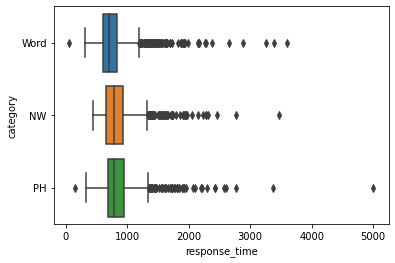

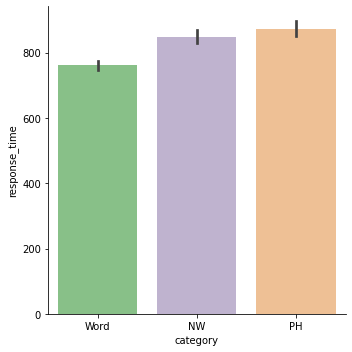

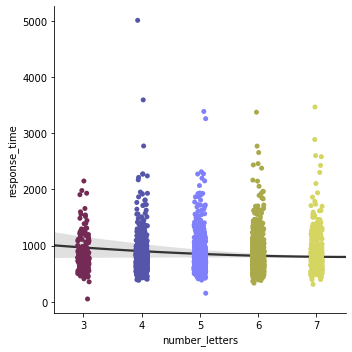

In [3]:
# showing some of my plots

sns.boxplot(data=df,  x="response_time",y="category")
# this shows us that there are loooots of outliers. We won't go into how this can be dealt with for now. 

sns.catplot(
    data=df, kind="bar",
    x="category", y="response_time",
    palette = "Accent")

sns.catplot(
    data=df, x="number_letters", y="response_time", hue="number_letters",
    palette = 'gist_stern'
)
sns.regplot(
    data=df, x="number_letters", y="response_time", scatter=False, truncate=False, order=2, color=".2",

)


So, now let's talk about what we want to write about in the report. What do we expect to find, and how can we illustrate these findings? What goes on the x-axis and y-axis?

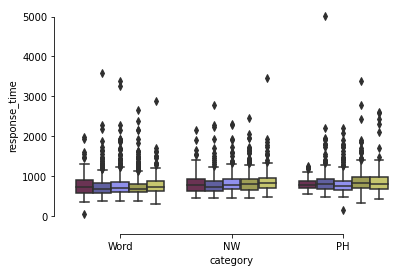

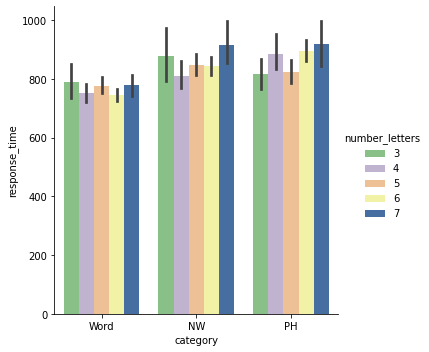

In [4]:
# we can do grouped plots!! the ones i just made are very basic, a way to make it slightly more complitcated
# is adding more thiiings

#df_noouts= df.loc[df['response_time'] < 2000]

sns.boxplot(data = df, x="category", y="response_time",
            hue="number_letters", palette = 'gist_stern')
sns.despine(offset=10, trim=True)
plt.legend([],[], frameon=False)

sns.catplot(
    data=df, kind = 'bar', x="category", y="response_time", hue="number_letters",
    palette = 'Accent'
)


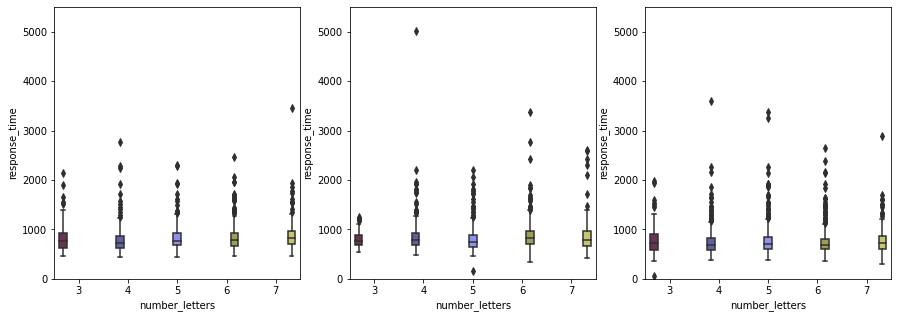

In [5]:
# now these plots can get a little crowded, so let's use matplotlib to split it up af bit
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# talk a bit about how this fig, axes thing works
# the fig is the canvas, the axes are the actual 'plots' and then we paint on top of our fig with these axes 

ax1 = sns.boxplot(data = df[(df['category'] == 'NW')], 
                  x="number_letters", y = 'response_time',
            hue="number_letters", palette = 'gist_stern',
                 ax = axes[0])
ax2 = sns.boxplot(data = df[(df['category'] == 'PH')], 
                  x="number_letters", y = 'response_time',
            hue="number_letters", palette = 'gist_stern',
                 ax = axes[1])
ax3 = sns.boxplot(data = df[(df['category'] == 'Word')], 
                  x="number_letters", y = 'response_time',
            hue="number_letters", palette = 'gist_stern',
                 ax = axes[2])


for ax in axes:

    ax.get_legend().remove()
    ax.set_ylim(0, 5500) # talk about why this is important if we want to compare plots, why is it misleading to not do this?


In [8]:
# doing the same plots but with how ethan did the data stuff 
df_means = df.groupby(['jatosStudyResultId', 'category', 'number_letters']).mean()
df_means.reset_index(inplace = True)
df_means['id'] = df_means['jatosStudyResultId']
data = df_means[['id', 'category', 'accuracy', 'number_letters', 'response_time']]

data.head()

,id,category,accuracy,number_letters,response_time
0,693,NW,86.333333,3,567.666667
1,693,NW,87.200000,4,573.500000
2,693,NW,88.846154,5,623.307692
3,693,NW,86.176471,6,633.411765
4,693,NW,85.333333,7,699.666667


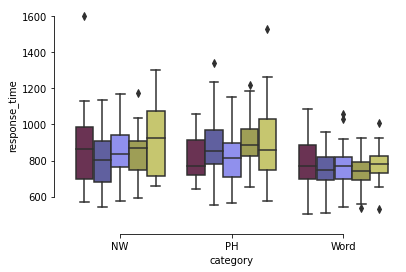

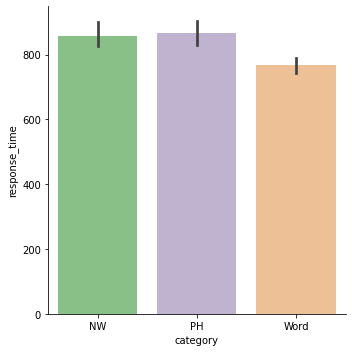

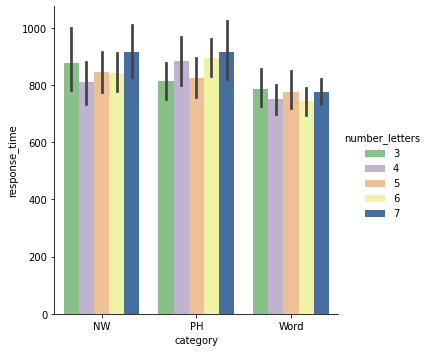

In [11]:

sns.boxplot(data = data, x="category", y="response_time",
            hue="number_letters", palette = 'gist_stern')
sns.despine(offset=10, trim=True)
plt.legend([],[], frameon=False)

sns.catplot(
    data=data, kind="bar",
    x="category", y="response_time",
    palette = "Accent")

sns.catplot(
    data=data, kind = 'bar', x="category", y="response_time", hue="number_letters",
    palette = 'Accent'
)

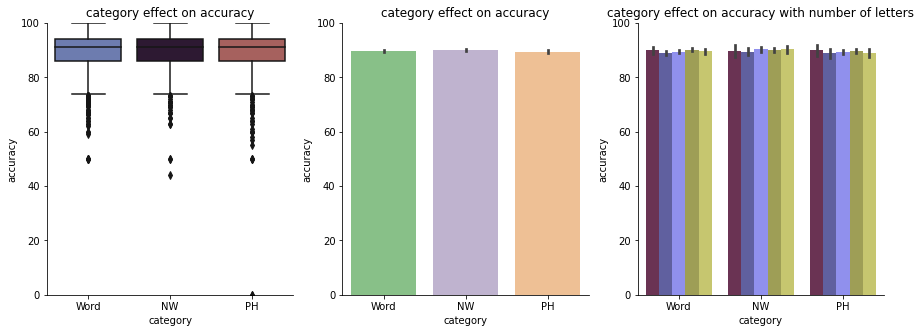

In [125]:
# okayyy now let's look at accuracy instead of rt

f, axes = plt.subplots(1,3, figsize = (15,5))

# make the titles as we go so we keep our overview 
titles = ['category effect on accuracy', 'category effect on accuracy',
         'category effect on accuracy with number of letters',
         'number of letters effect on accuracy with category']

ax1 = sns.boxplot(
    data=df,  x="category",y="accuracy", 
    palette = 'twilight', ax = axes[0])

ax2 = sns.barplot(
    data=df, x="category", y="accuracy", 
    palette = "Accent", ax = axes[1])



ax3 = sns.barplot(
    data=df, x="category", y="accuracy", hue="number_letters",
    palette = 'gist_stern', ax = axes[2]
)
ax3 = plt.legend([],[], frameon=False)


#ax4 = sns.lmplot(
    #data = df, x = 'number_letters', y = 'accuracy', hue = 'category',
    #palette = 'gist_stern', ax = axes[3])

# lots of these things we can only do after making the plots alone and then building up
# e.g., we need to know the approcimate accuracy to make the right limits on the axis

for n, ax in enumerate(axes):
    ax.spines['right'].set_visible(False) # so this removes the right line on the plot
    ax.spines['top'].set_visible(False) # this removes the top line
    #ax.get_legend().remove() # this removes the legend
    #ax.set_xlim(50, 105) # we want these if we want to compare the plots, otherwise they become misleading
    ax.set_ylim(0, 100) # same with this, try a few different numbers and see what you like
    ax.set_title(titles[n]) # setting the right title
    

## Challenge 1: Explore the MEGALEX data

Take a look at the megalex data (described in Ferrand et al, 2010, available in the course site on Brightspace), which tests native French speakers, and compare their results to ours. 

1. Are they similar or different? 
2. What could account for any differences?
3. Make a plot (or plots) illustrating any simiarities or differences you want to highlight.


#### References

Ferrand, L., New, B., Brysbaert, M., Keuleers, E., Bonin, P., Méot, A., ... & Pallier, C. (2010). The French Lexicon Project: Lexical decision data for 38,840 French words and 38,840 pseudowords. Behavior research methods, 42(2), 488-496.

In [93]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn' # I found I needed this to get rid of an annoying warning message

rawdata_mega = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/MEGALEX.csv')
rawdata_mega.head()
rawdata_mega.shape

(38335, 13)

In [94]:
#rawdata_mega.loc[(rawdata_mega['lc_freq_movies'] == '#NAME?')]
import numpy as np

#rawdata_mega['condition'] = np.where(rawdata_mega['lc_freq_movies']=='#NAME?', 'NW', 'Word')

df['system']= np.where(df['system_os']=='Macintel', '0', '1')

df_means.reset_index(inplace = True)

In [95]:
rawdata_mega.head()

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables,condition
0,abaissa,25,0.04,721.833333,106.416191,-0.035017,24,0.00,#NAME?,2.64,0.421603927,7,3,NW
1,abaissait,25,0.08,836.782609,257.778086,0.366517,23,0.02,-1.698970004,2.50,0.397940009,9,3,Word
2,abaissant,26,0.00,773.840000,224.378713,0.254392,25,0.04,-1.397940009,2.77,0.442479769,9,3,Word
3,abaisse,25,0.04,698.826087,246.667913,-0.216788,23,1.30,0.113943352,3.45,0.537819095,7,2,Word
4,abaissé,25,0.00,656.782609,177.024897,-0.434544,23,0.77,-0.113509275,1.55,0.190331698,7,3,Word


In [96]:
df2 = rawdata_mega[['item', 'rt', 'rtz', 'n_letters', 'condition']]
df2.shape

(38335, 5)

In [88]:
df2['condition'].value_counts()
# hmmmm
# let's not care about it for now

Word    36138
NW       2197
Name: condition, dtype: int64

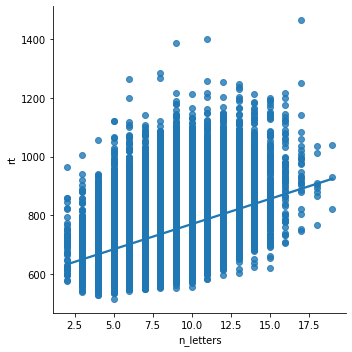

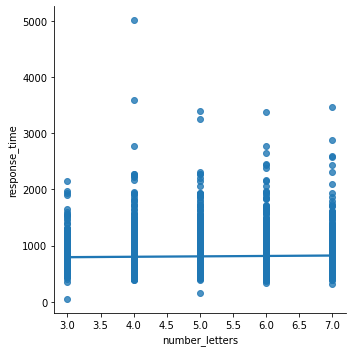

In [98]:
sns.lmplot(data = df2, x = 'n_letters', y = 'rt')
sns.lmplot(data = df, x = 'number_letters', y = 'response_time')
# so obviously they have longer words + they have removed outliers from their response times 

### working through ethan's complicated code

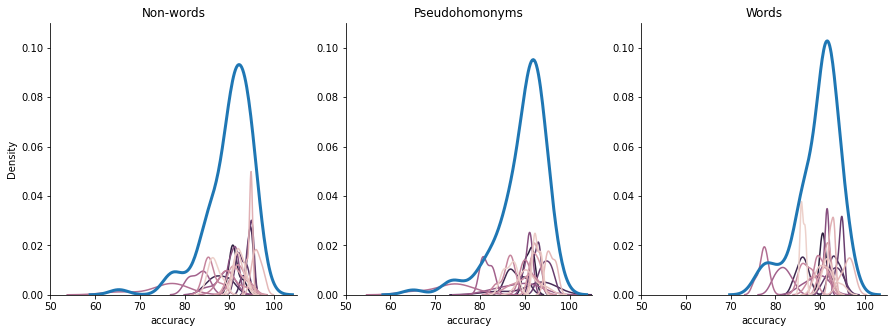

In [113]:
# working through ethan's complicated code

# we create a new 'canvas'
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# define the first subplot on our canvas
# this plot takes accuracy and makes a density line for every ID in the data, but only for NW
ax1 = sns.kdeplot(x = 'accuracy', hue = 'id', 
                  data = data[(data['category'] == 'NW')], 
                  ax=axes[0])

# and then makes a line for the whole data, so no longer for the individual but for every NW data point together
# as if it was one person, basically 
ax1 = sns.kdeplot(x = 'accuracy', data = data[(data['category'] == 'NW')], 
                  ax=axes[0], linewidth = 3)



# the same but for ph
ax2 = sns.kdeplot(x = 'accuracy', hue = 'id', 
                  data = data[(data['category'] == 'PH')], 
                  ax=axes[1])

ax2 = sns.kdeplot(x = 'accuracy', data = data[(data['category'] == 'PH')], 
                  ax=axes[1], linewidth = 3)

# and for words
ax3 = sns.kdeplot(x = 'accuracy', hue = 'id', 
                  data = data[(data['category'] == 'Word')], 
                  ax=axes[2])

ax3 = sns.kdeplot(x = 'accuracy', data = data[(data['category'] == 'Word')], 
                  ax=axes[2], linewidth = 3)

# since they all have the same y-axis, it just looks nicer to exclude the label from plot 2 & 3
# try commenting this out and running the code again, you'll see the difference
ax2.set(ylabel = '')
ax3.set(ylabel = '')

# now, in the plot setup, we defined which axis they should belong to. 
# so below we loop over the three plots, because there are certain settings we want to apply to them all
# in contrast to when we define them separately, we define how they are different
# you can comment out the different things one at a time to see what they do - it is pure aesthetic 


for ax in axes:
    ax.spines['right'].set_visible(False) # so this removes the right line on the plot
    ax.spines['top'].set_visible(False) # this removes the top line
    ax.get_legend().remove() # this removes the legend
    ax.set_xlim(50, 105) # we want these if we want to compare the plots, otherwise they become misleading
    ax.set_ylim(0, 0.11) # same with this, try a few different numbers and see what you like

    
# i prefer to have it down here, bc it is only right below we use the titles
titles = ['Non-words', 'Pseudohomonyms', 'Words']

# we could actually make this part of the first loop, but for readability we do it here
# we count which plot we have reached in the loop, and use that count to grap the appropriate title 
for n, ax in enumerate(axes):
    ax.set_title(titles[n])